**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be graded on scale of 0-4 scale, following the standard NJIT convention (A: 4, B+: 3.5, B: 3, C+: 2.5, C: 2, D: 1, F: 0).

The total score must be re-scaled to 100 so that Canvas gives the same weight to Assignments 2-6.

For questions stated as being worth 8 points, grade on a 0-4 scale, and multiply by 2.

# **Assignment 2**

This assignment walks you through the basics of the perceptron. You will also do some first experiments on a toy data set, and check the effect of hyperparameters. The intended goal of the assignment is to familiarize you further with the Jupyter/Colab environment and help you acquire some tools that we will later use to experiment with 'professional-grade' data sets and algorithms.


<b>Note: </b> You must run/evaluate all cells. <b>Order of cell execution is important.<b>

**You may use ChatGPT or other LLMs to help with this assignment.** (Unless the question specifically requests it, the use of LLMs is **optional**.) However, if you do use an LLM to help with a particular question, you must submit a full transcript of all your interactions with the LLM in the form of screenshots embedded in the text cells provided. You must also do this on your own &mdash; using the results of another person's LLM session, or sharing your session with another student, are not acceptable. In your answer, you should also state how you were able to make use of the LLM's responses.

Here is an example of what a ChatGPT transcript looks like. Note that the transcript includes the full output as well as the user prompt that generated the ChatGPT response. Please use a separate text cell for each image you embed.

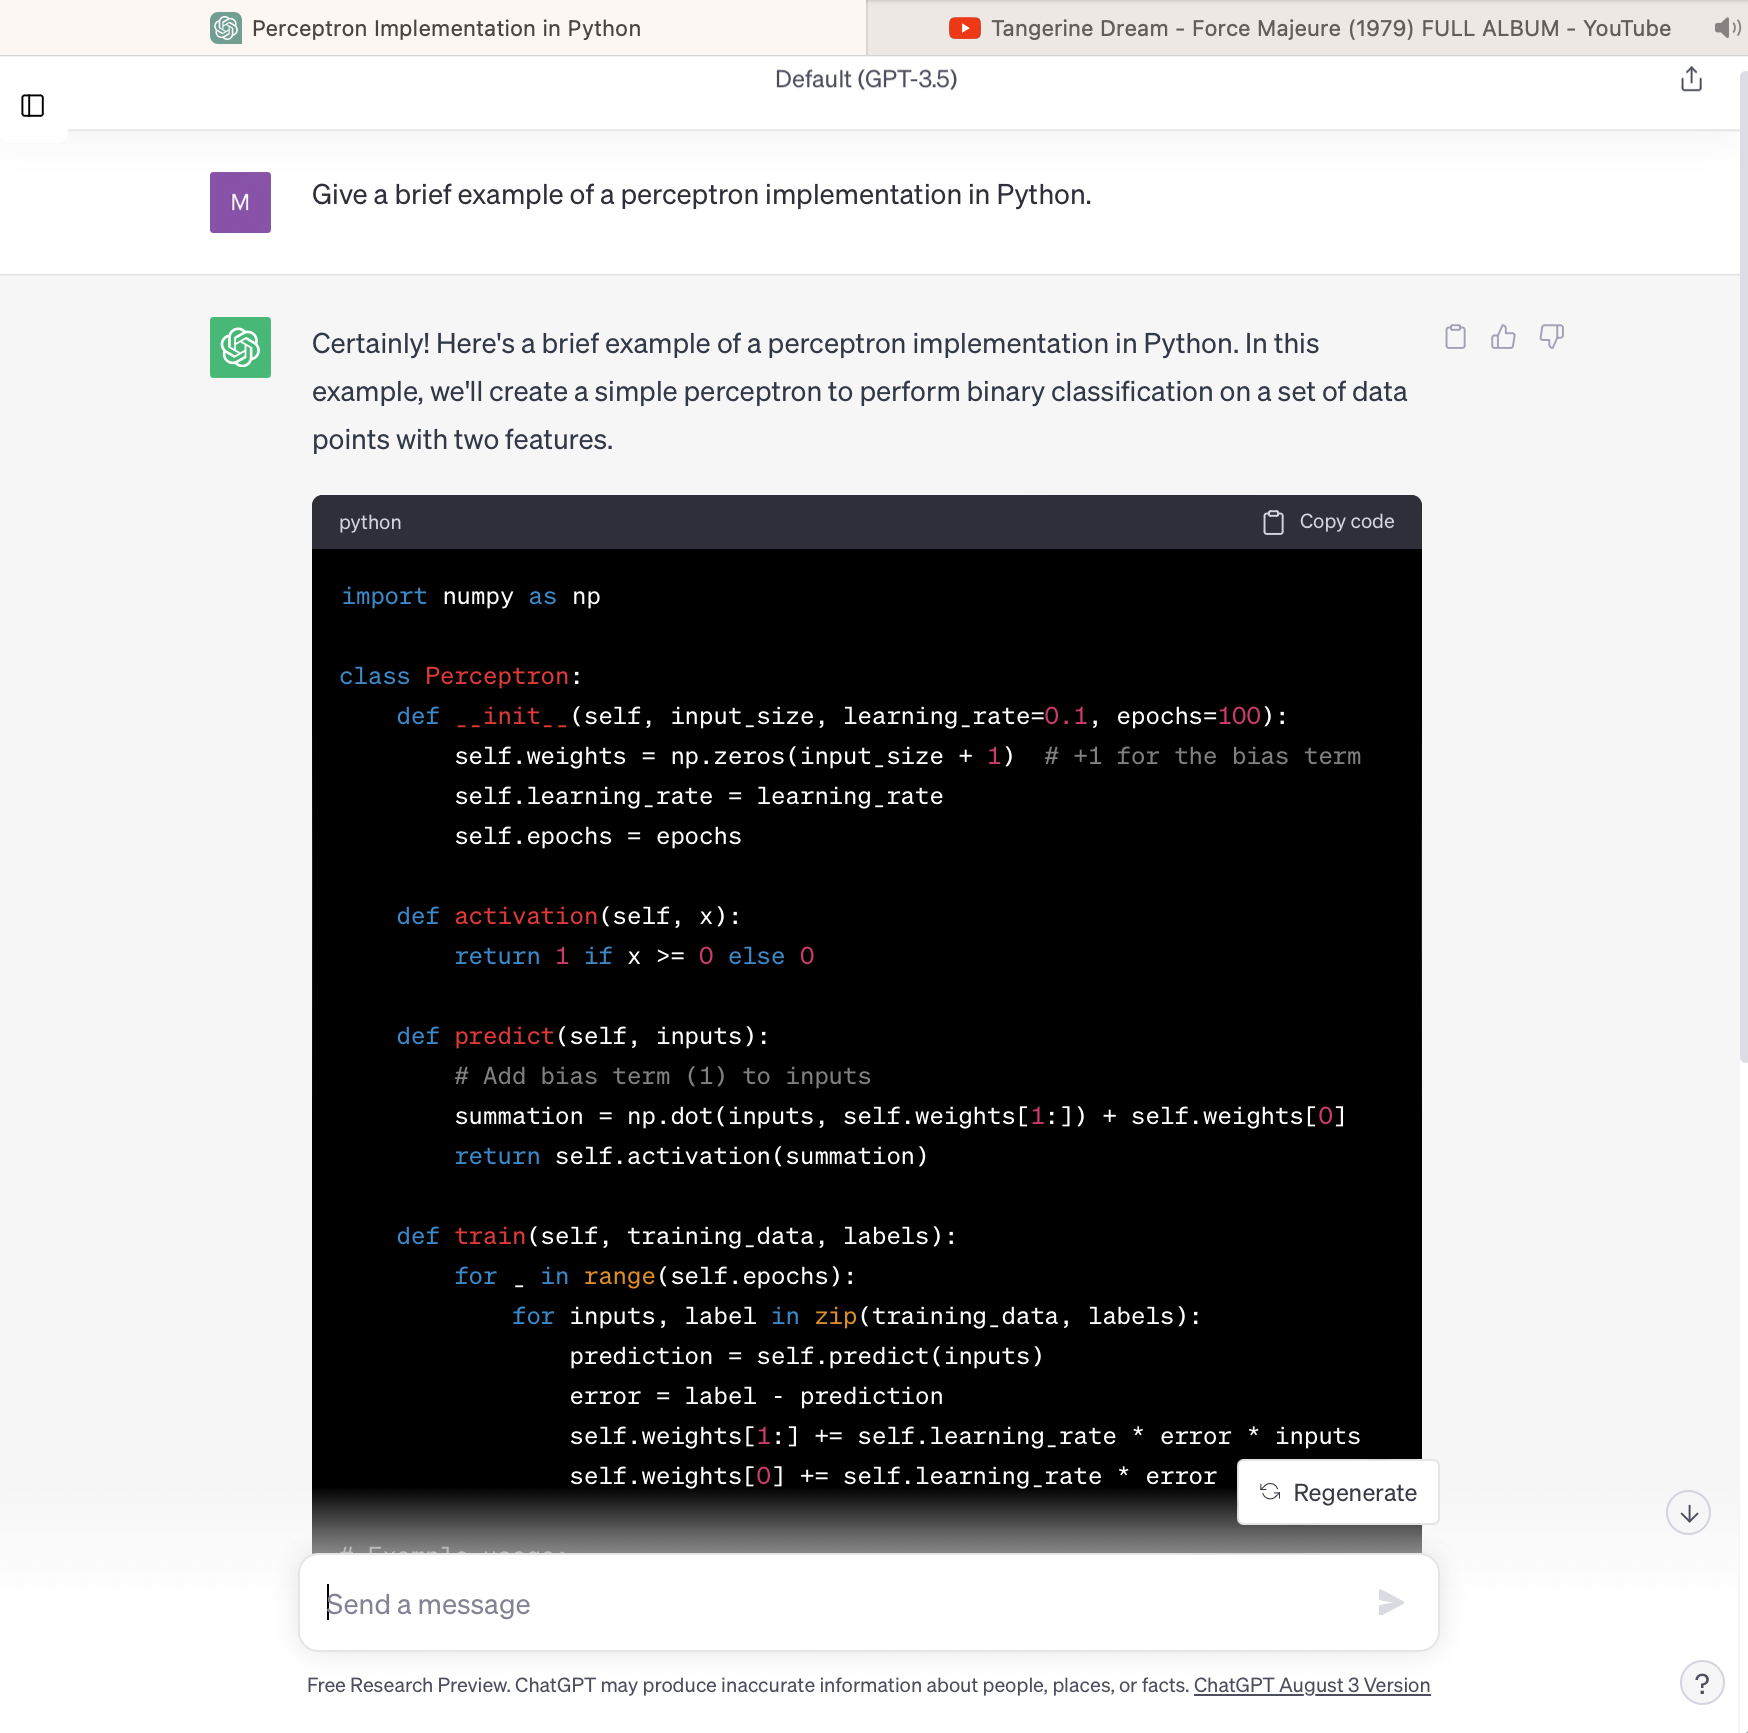

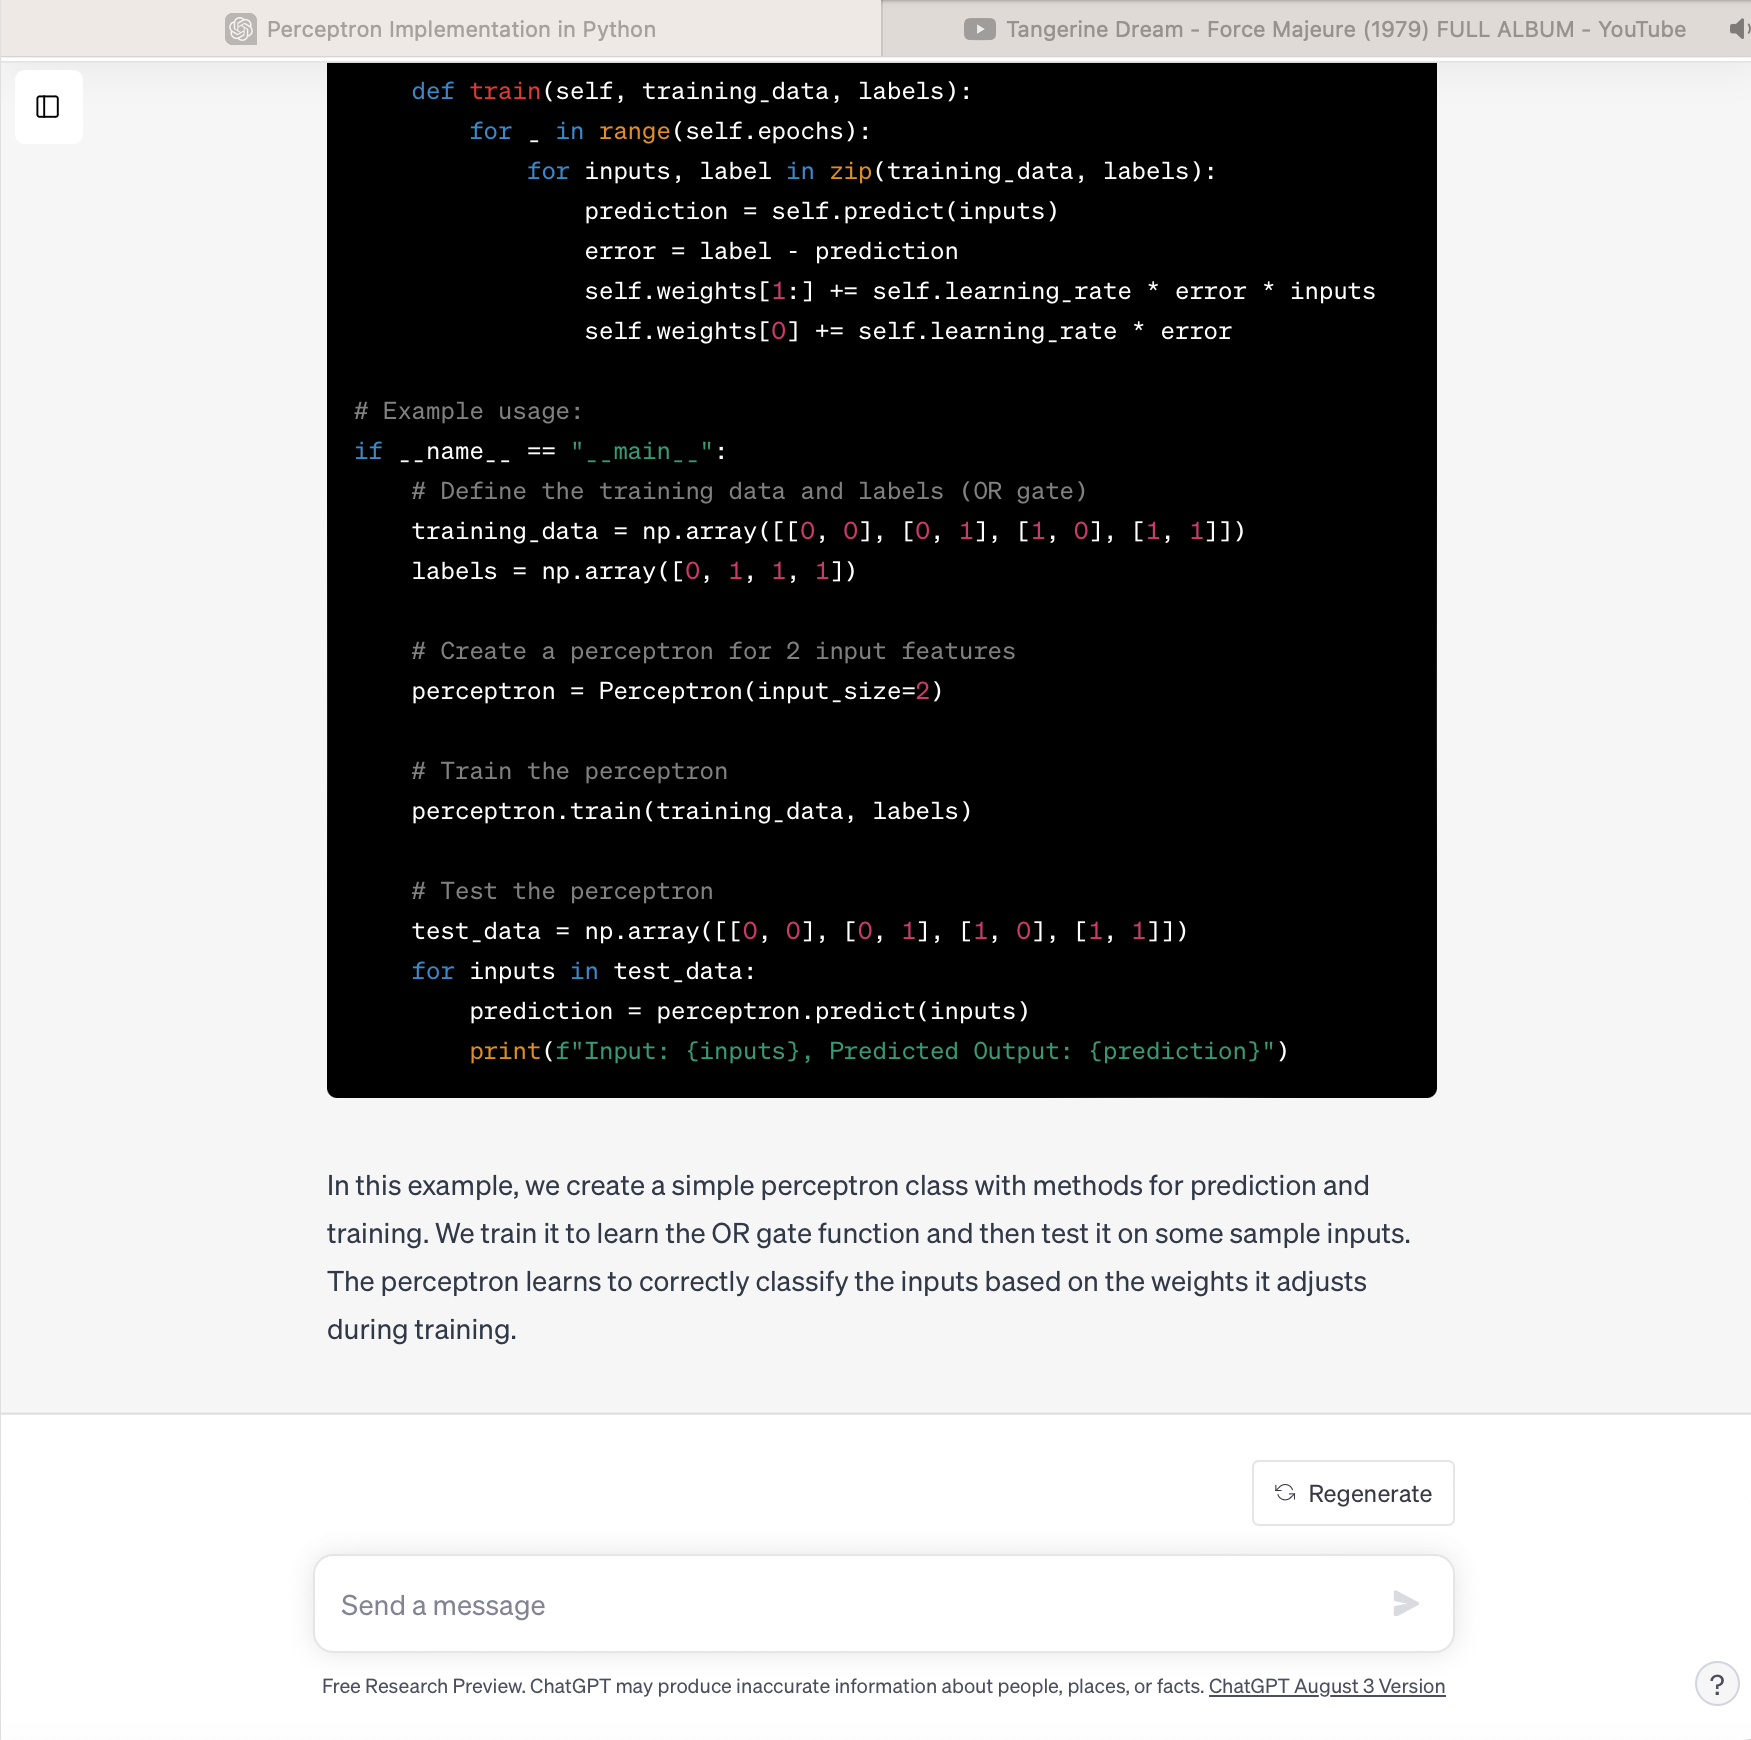

## Preparation Steps

In [ ]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
# ### Loading the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


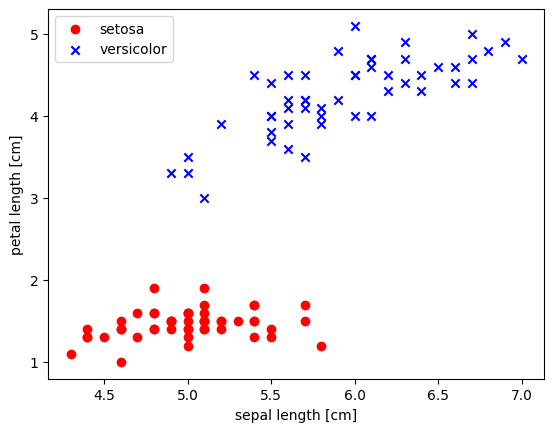

In [ ]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

-----------------------
-----------------------
-----------------------



## <font color='#008DFF'> **Question 0: Manual Perceptron Training**

Below you can see 5 points of the data set, all labeled as 'setosa'.

In [ ]:
X[5:10], y[5:10]

(array([[5.4, 1.7],
        [4.6, 1.4],
        [5. , 1.5],
        [4.4, 1.4],
        [4.9, 1.5]]),
 array([-1, -1, -1, -1, -1]))

Suppose the initial weights of the perceptron are $w_0 = 5.0$, $w_1 = -0.1$, $w_2 = 4.5$. Here $w_0$ is the bias.

Write the weights after processing data points 5, 6, 7, and show all your calculations (with $\eta = 0.1$ and noting that $y,\hat{y}\in\{-1,1\}$):

Please give your answers in the cell below.

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

**ANSWER:** The updated weights after processing the data points are:
w0 = 4.6,
w1 = -2.1,
w2 = 3.88. I used ClaudeAI for help for how to initialize the problem but not for the answer.


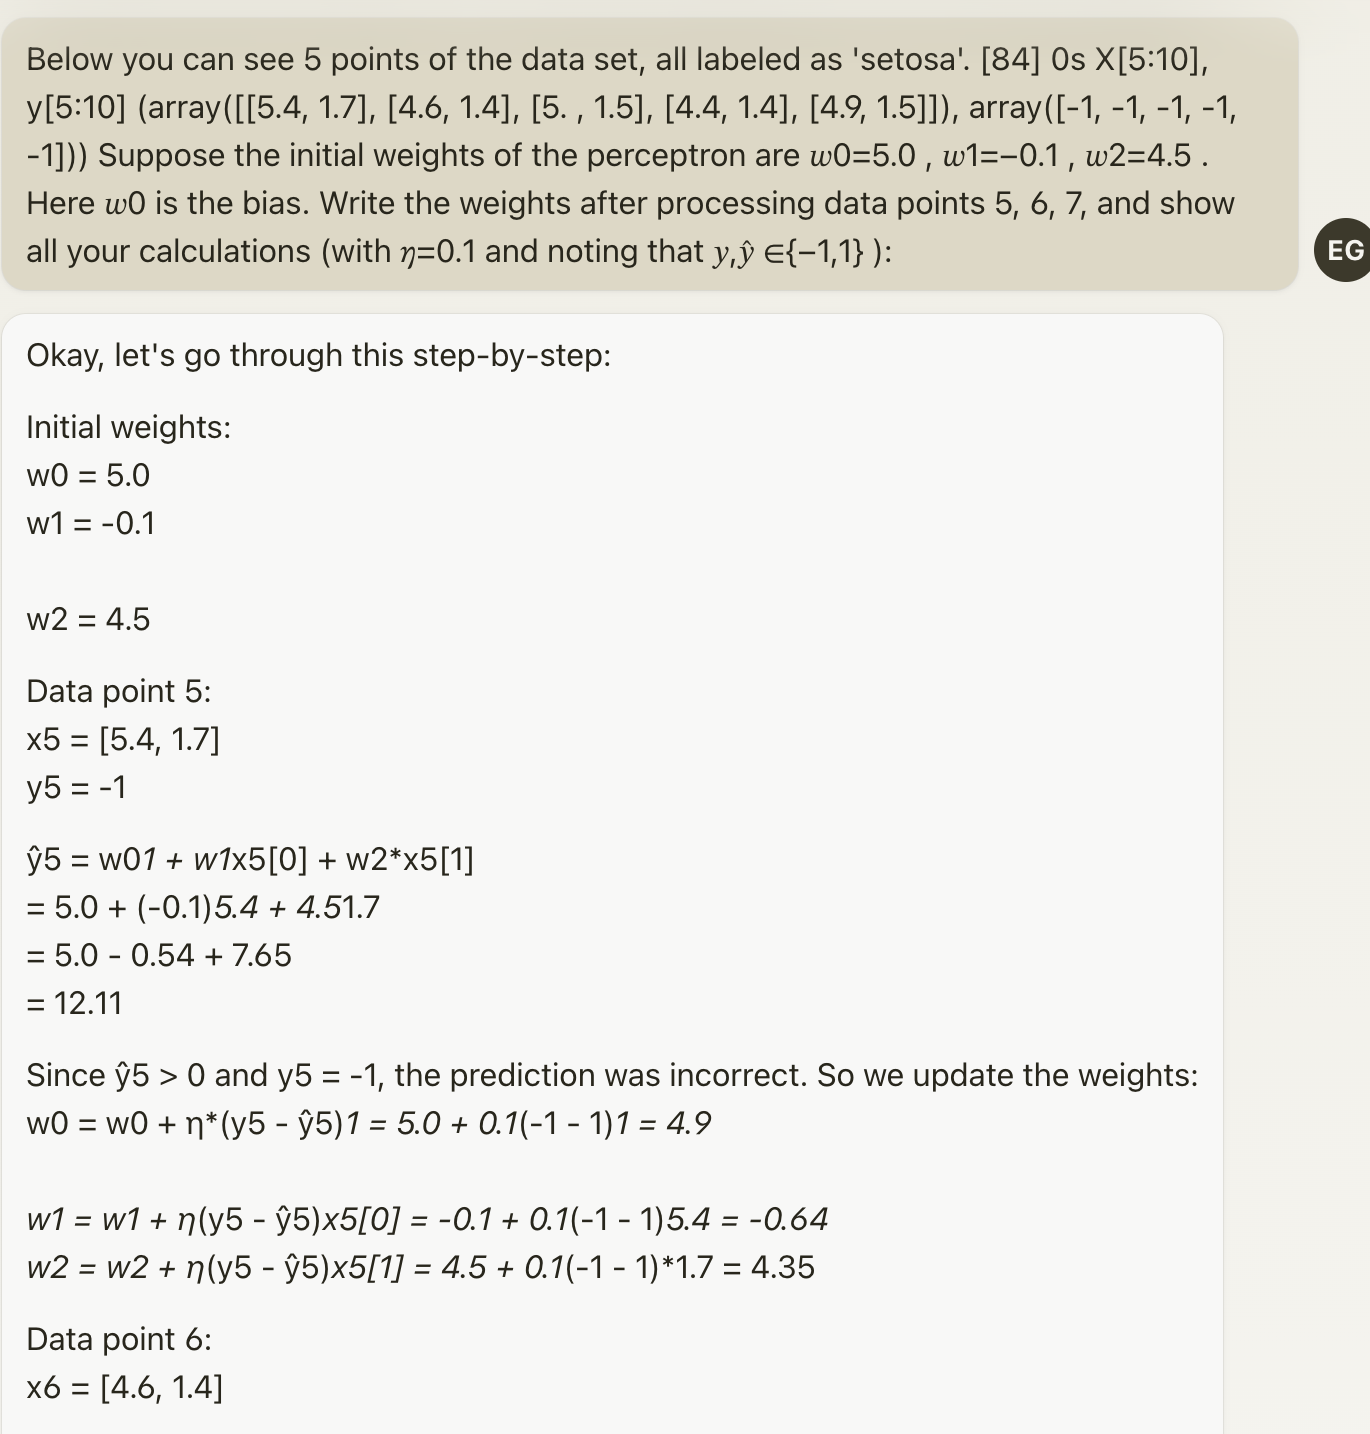

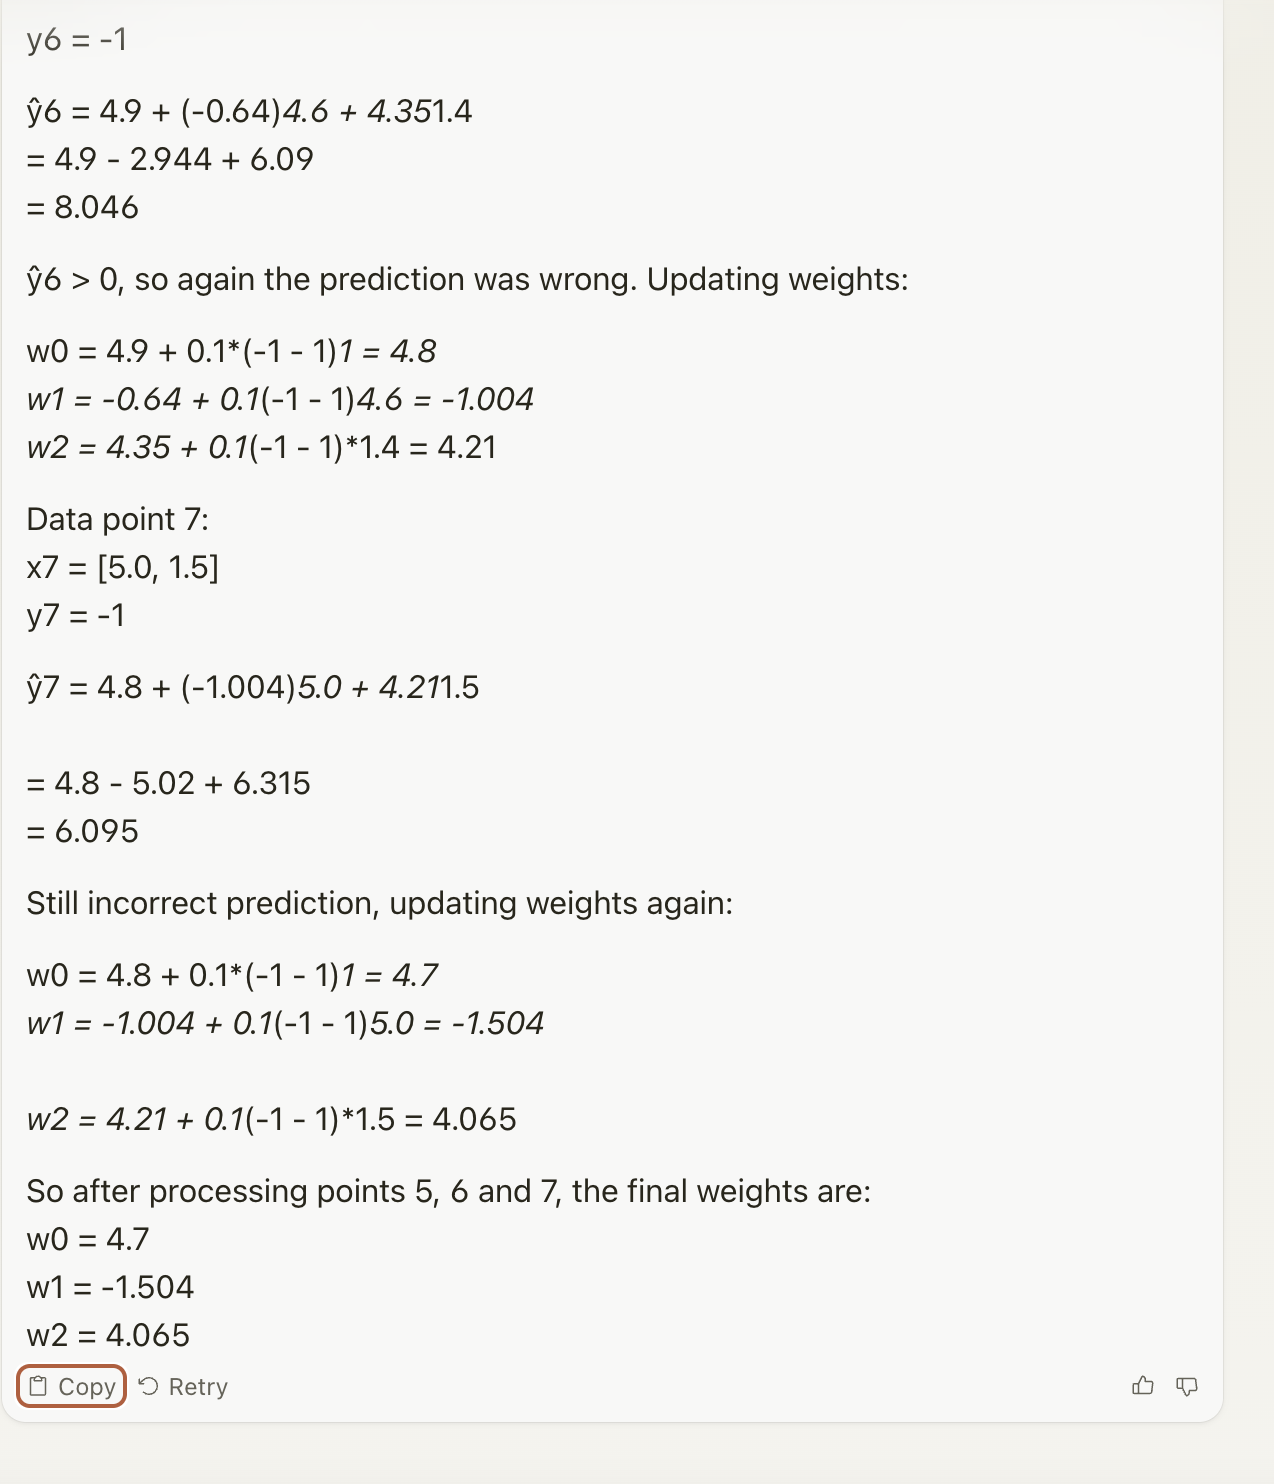

In [ ]:
# Grader's area
import numpy as np
M = np.zeros([10,10])
maxScore = 0

maxScore = maxScore +4
# M[0,1] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 1: Perceptron Code Modification**

The following code is a perceptron implementation (with three do-nothing lines 59-61).

In [ ]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    iterations_ : int
      Number of iterations performed during training.
    weights_history_ : list
      Weights History after each point. #added this new to my code

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        self.iterations_ = 0
        self.weights_history_ = [self.w_.copy()]  #added to keep history of weights

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi)) #switched these
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                self.weights_history_.append(self.w_.copy())  #Stores the weight for each data point
            self.errors_.append(errors)
            self.iterations_ += 1

            # Stop if no errors - made sure to check for errors
            if errors == 0:
                break

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


There is a significant error in the above perceptron implementation. Work on the above cell and modify the code so that:

(i) The line containing the error is commented out, and a new line is added with corrected code.<br>
(ii) The fit function stops when no more iterations are necessary. <br>
(iii) The trained perceptron contains as an attribute not only its weights, but also the number of iterations it took for training. <br>
(iv) The perceptron maintains a history of its weights, i.e. the set of weights after each point is processed.

At each place where you have modified the code, please add clear comments surrounding it, similarly to the "do-nothing" code. Make sure you evaluate the cell again, so that following cells will be using the modified perceptron.


(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[1,1] =
# M[1,2] =
# M[1,3] =
# M[1,4] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 2: Experimenting with hyperparameters**

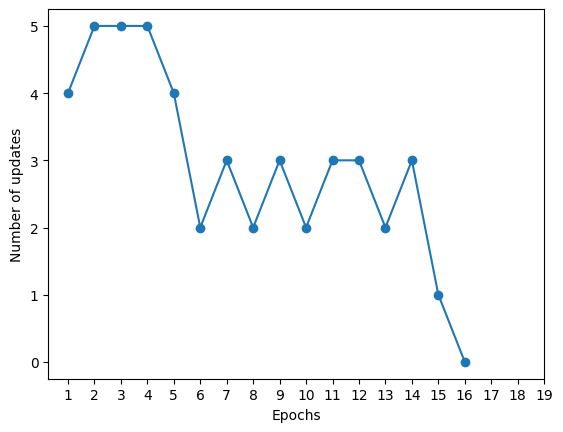

In [ ]:
ppn = Perceptron(eta=0.0001, n_iter=20, random_state=1)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xticks(range(1, 20))  # Set integer x-axis labels
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()

Running the above code, you can verify whether your modification in Question 1 works correctly. The point of this question is to experiment with the hyperparameter $\eta$, the learning rate. Here are some specific questions:
<br>

(i) Find values of $\eta$ for which the process requires 10, 20, 30, and 40 iterations to converge. <br>
(ii) Is it always the case that raising $\eta$ leads to a reduced (or equal) number of iterations? Explain with examples. <br>
(iii) Find two different settings for the random state, that give different convergence patterns for the same value of $\eta$. <br>
(iv) Based on your experiences in parts (i)-(iii), would **binary search** be an appropriate strategy for determining values of $\eta$ for which the perceptron converges within a desired number of iterations?

Please give your answers in the cell below.

a. For 10 iterations, eta value is around 0.000196.
For 20 iterations, eta value is around 0.000052.
For 30 iterations, eta value is around 0.000019.
For 40 iterations, eta value is around 0.0000043.
<br>b. In this case, raising ŋ does lead to a reduced number of iterations. However, this may not always be the case. An example of this can be seen with overshooting the learning rate by increasing it too much where the algorithm will fail to converge. You would want to balance the learing rate.
<br>c. An example of the effects of changing the random state can be seen at the converage state at 40 iterations with Ŋ=0.0000043. When the random state is 12 and 16, it converges differently.At random state of 12, it converages at 3 iterations while at 16, it converages at 7 epochs.
<br> d. Binary search would not be the best idea for this case because the convergence and eta does not show a linear relationship which is needed for binary search. A better option to use is grid search as mentioned in lecture.
<br>

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[2,1] =
# M[2,2] =
# M[2,3] =
# M[2,4] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 3: Visualizing multiple decision regions over time**

Here is the function for visualizing decision regions.

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'o', 'P', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

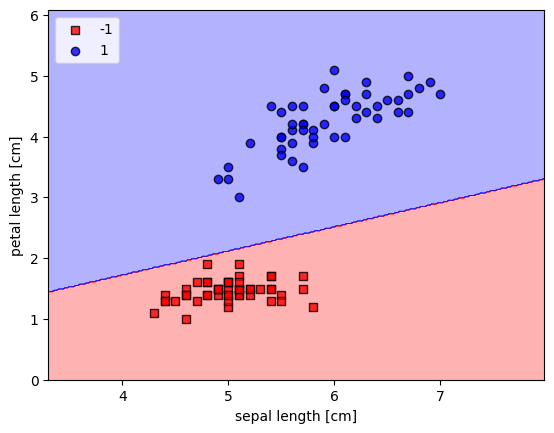

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

Using the above, give code that plots the decision regions for the first 10 epochs. Use learning rate = 0.01 and random seed = 1 when applicable.

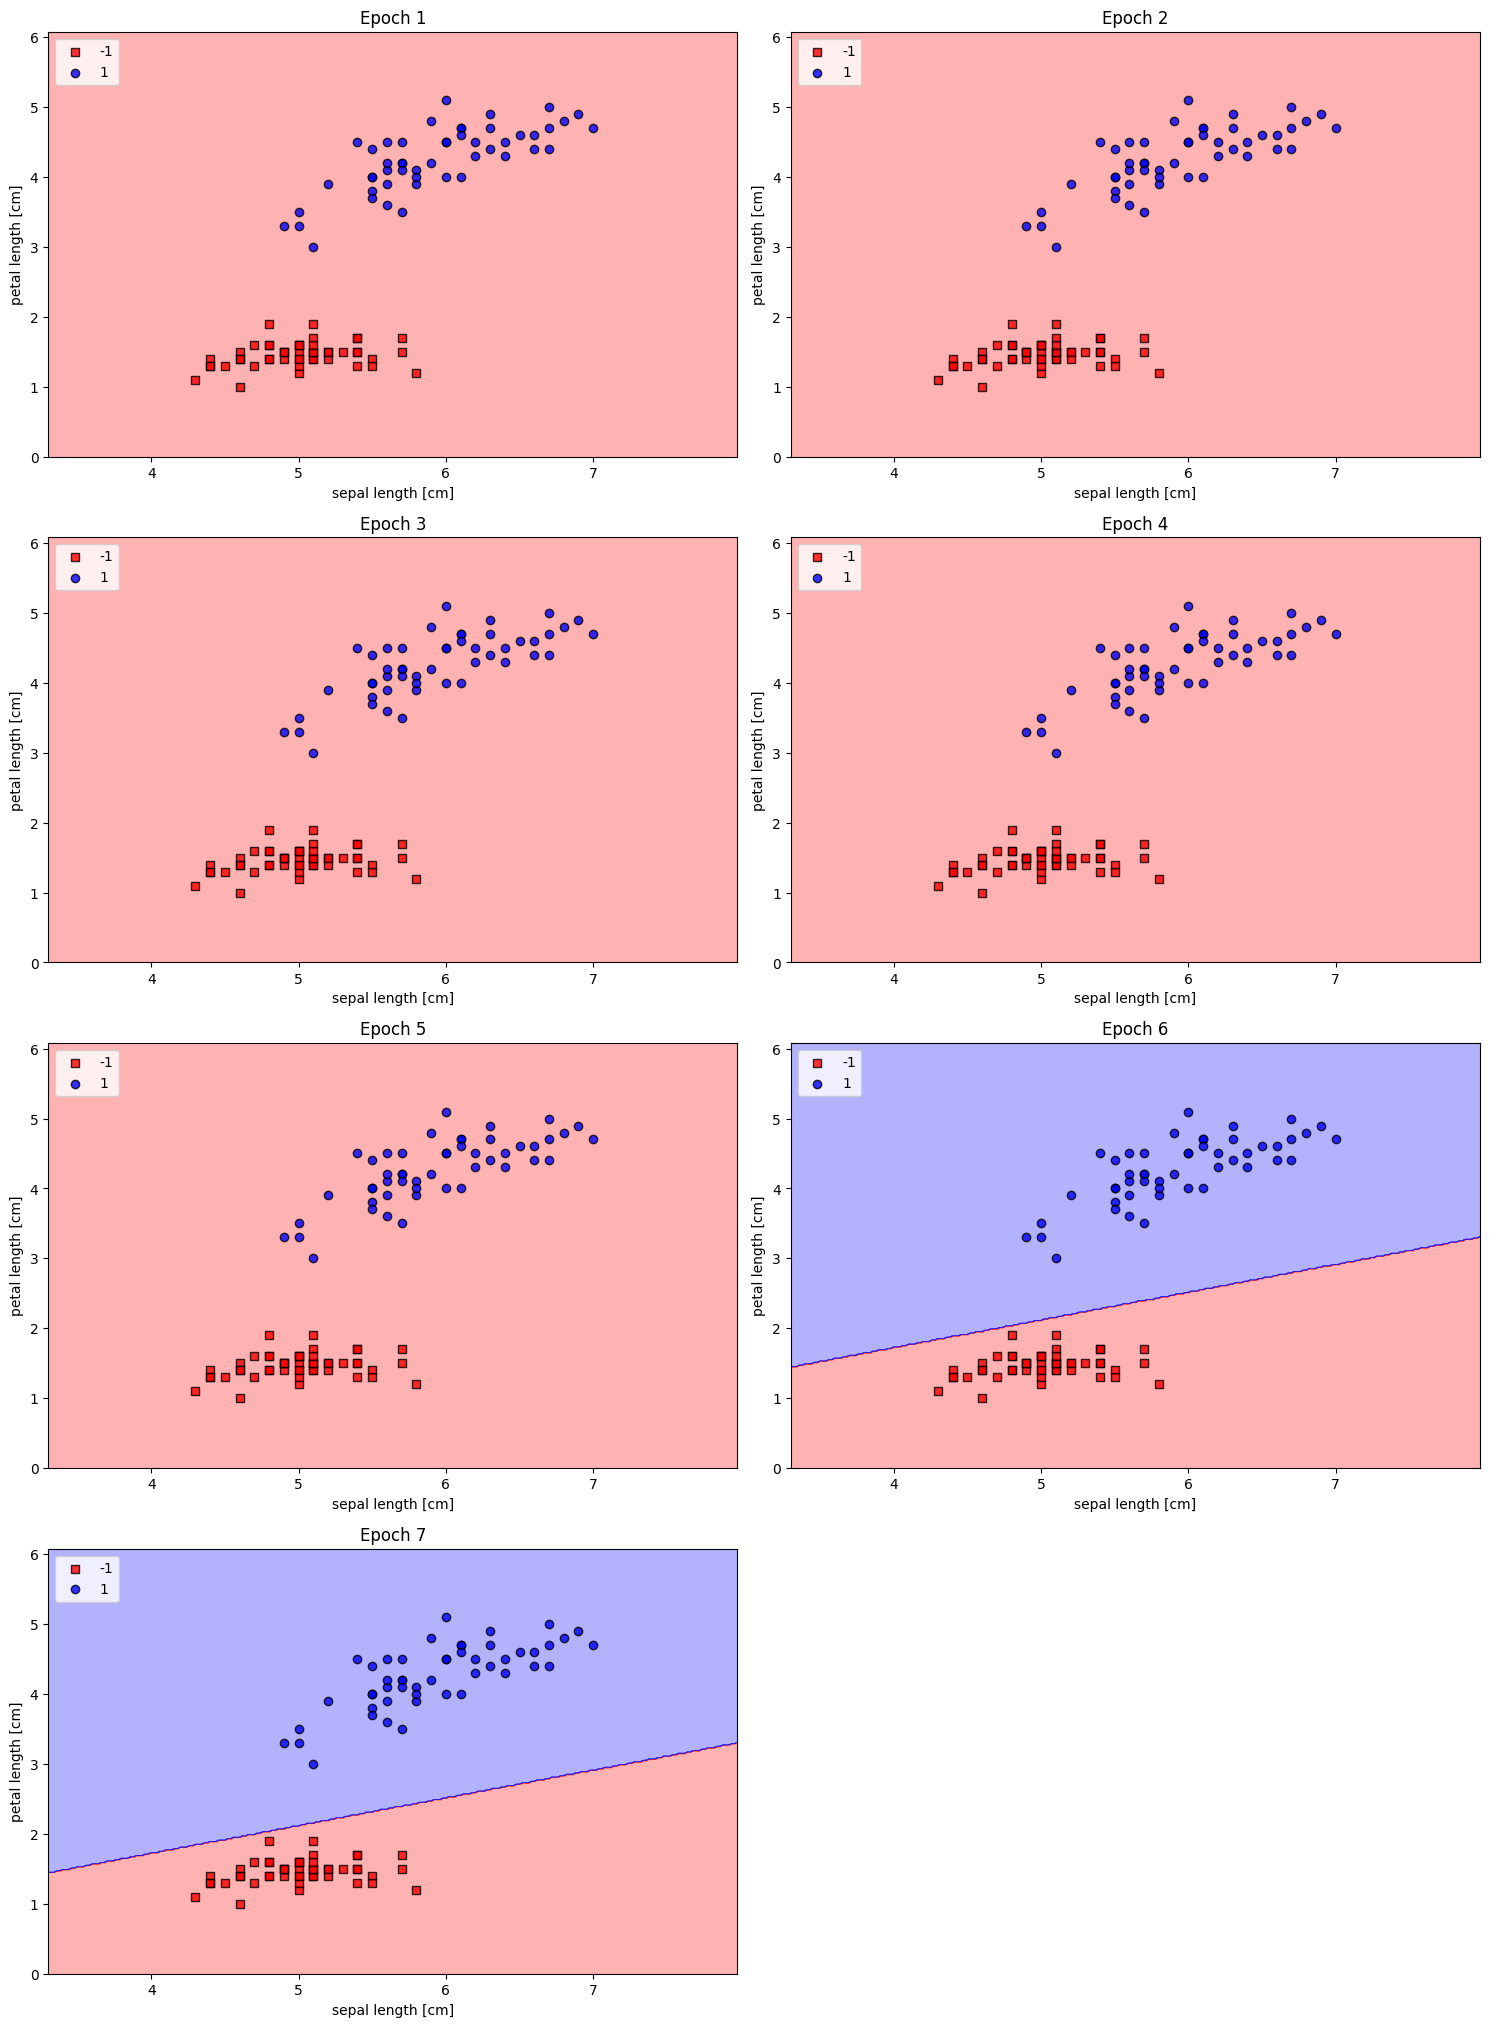

In [ ]:
class PerceptronQii(Perceptron): #creating a class to update rules to fit method
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        self.weights_history_ = [self.w_.copy()]
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                if update != 0:
                    self.w_[1:] += update * xi
                    self.w_[0] += update
                    errors += 1
            self.errors_.append(errors)
            self.weights_history_.append(self.w_.copy())
            if errors == 0:
                break
        self.n_iterations_ = _ + 1
        return self

# Train the PerceptronQii
ppn_epoch = PerceptronQii(eta=0.01, n_iter=10, random_state=1)
ppn_epoch.fit(X, y)

# Plot the decision regions for the first 10 epochs
plt.figure(figsize=(15, 25))
for i in range(min(10, len(ppn_epoch.weights_history_))):
    plt.subplot(5, 2, i+1)
    ppn_epoch.w_ = ppn_epoch.weights_history_[i]
    plot_decision_regions(X, y, classifier=ppn_epoch)
    plt.title(f'Epoch {i+1}')
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left')
plt.tight_layout()
plt.show()




(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[3,1] =


-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 4: Changing the data order in training**



The data arrays (X, y) currently in the memory are organized so that all data points with a given label (e.g. 'Setosa') lie in a contiguous part of the arrays (X, y). In this question we will check the impact of changing the order of the data on the number of iterations required to learn a correct perceptron.


The commented code below needs a small change in order to generate a random shuffle (permutation) of the data. Please look up the particular functions of the code, see how they work, and then do the required modification and uncomment / evaluate the code.

In [ ]:
# establish a random shuffle
s = np.arange(10)
np.random.shuffle(s)
# shuffle sample
X_shuffle = X[s];
y_shuffle = y[s];


Modify the code below as follows: <br>
(i) Pick a sufficiently small value of $\eta$, so that convergence takes 20 iterations or more. <br>
(ii) Add an extra line that fits the perceptron on the shuffled data. <br>
(iii) Plot the error for both training processes (the original data and the shuffled data). <br>
(iv) What do you observe?

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

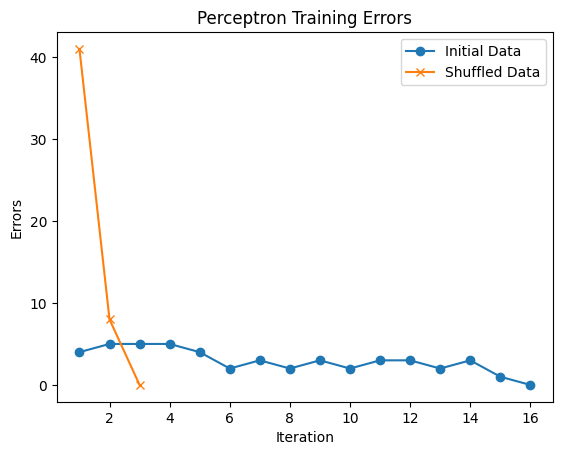

In [ ]:
#instance of the Peceptrn with the chosen eta=0.0001 and n_iter=30
ppn = Perceptron(eta=0.0001, n_iter=30)
# Fitting the perceptron on the intial  data
ppn.fit(X, y)

#shuffling data -- taking from code above
shuffledup_i = np.random.permutation(len(y))
X_shuffledup = X[shuffledup_i]
y_shuffledup = y[shuffledup_i]

# fitting the perceptron: the shuffled data
ppn_shuffledup = Perceptron(eta=0.0001, n_iter=30)
ppn_shuffledup.fit(X_shuffledup, y_shuffledup) # fitting x and y shufffled data


#plotting the errors for both
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o', label='Initial Data')
plt.xlabel('Iteration')
plt.ylabel('Errors')
plt.title('Perceptron Training Errors')

plt.plot(range(1, len(ppn_shuffledup.errors_) + 1), ppn_shuffledup.errors_, marker='x', label='Shuffled Data')
plt.legend()
plt.show()




<br>  I observe that the shuffled data quickly drops to 0 errors by the third iteration while the initial data steadily drops errors over 16 iterations shown in the graph. This can suggests that the shuffled data has quicker convergence to a solution compared to the initial ordering of the data.
<br>
<br>
<br>

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[4,1] =
# M[4,2] =
# M[4,3] =
# M[4,4] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 5: Understanding linear transformations**

Suppose that we have a 2-dimensional data set $X$. We transform each data point $X_j = (X_{j,1}, X_{j,2})$ as follows: $\tilde{X_j} = ( a X_{j,1} - c, b X_{j,2}-c)$, where $a$, $b$, $c$ are constant values. This is a linear transformation, because our transformed data comes from simple operations that use 'first powers' of the original data.

If our given data set is linearly separable, does the same hold true for the transformed set? In the following cells you can plot a transformed version of the Iris dataset, so that you see how it behaves (for your choice of $a$, $b$, $c$.) But you should also try and justify your answer in a theoretical way: if there exists a  'good' perceptron for the original data set, what would be the weights for the perceptron that works on the transformed set? Are there any issues that might arise?

(1) Give your own answer to the above question.

(2) What happens when you use an LLM such as ChatGPT to answer the question? Was the LLM helpful in resolving it?

My Answer: Yes, if our given data is linearly seperable, it does hold the same for the transformed set. Below is an example using the Iris dataset. Furthermore, the weights of transformed data would change based on how the transformation's effects on the data distribution and the decision boundary. I think an issue might arise may be complexity problem from the the type of transformation being preformed.

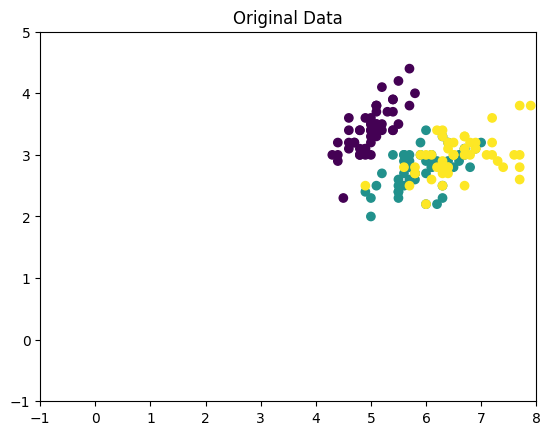

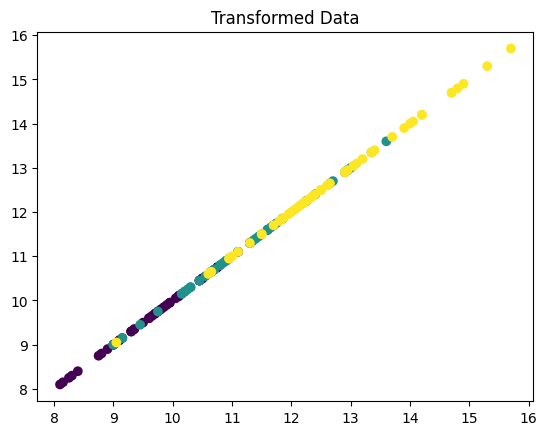

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Loading Iris data
X, y = load_iris(return_X_y=True)

#first two features
X = X[:, :2]

# Plot original data
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim(-1, 8)
plt.ylim(-1, 5)
plt.title("Original Data")
plt.show()

# Transformation of parameters
a = 2
b = 0.5
c = 1

# Apply linear transformation based on equation above
X_transformed = a*X[:, 0] - c + b*X[:, 1] - c

# Plot transformed data
plt.scatter(X_transformed, X_transformed, c=y)
plt.title("Transformed Data")
plt.show()


In [ ]:
#ChatGPT answer below:

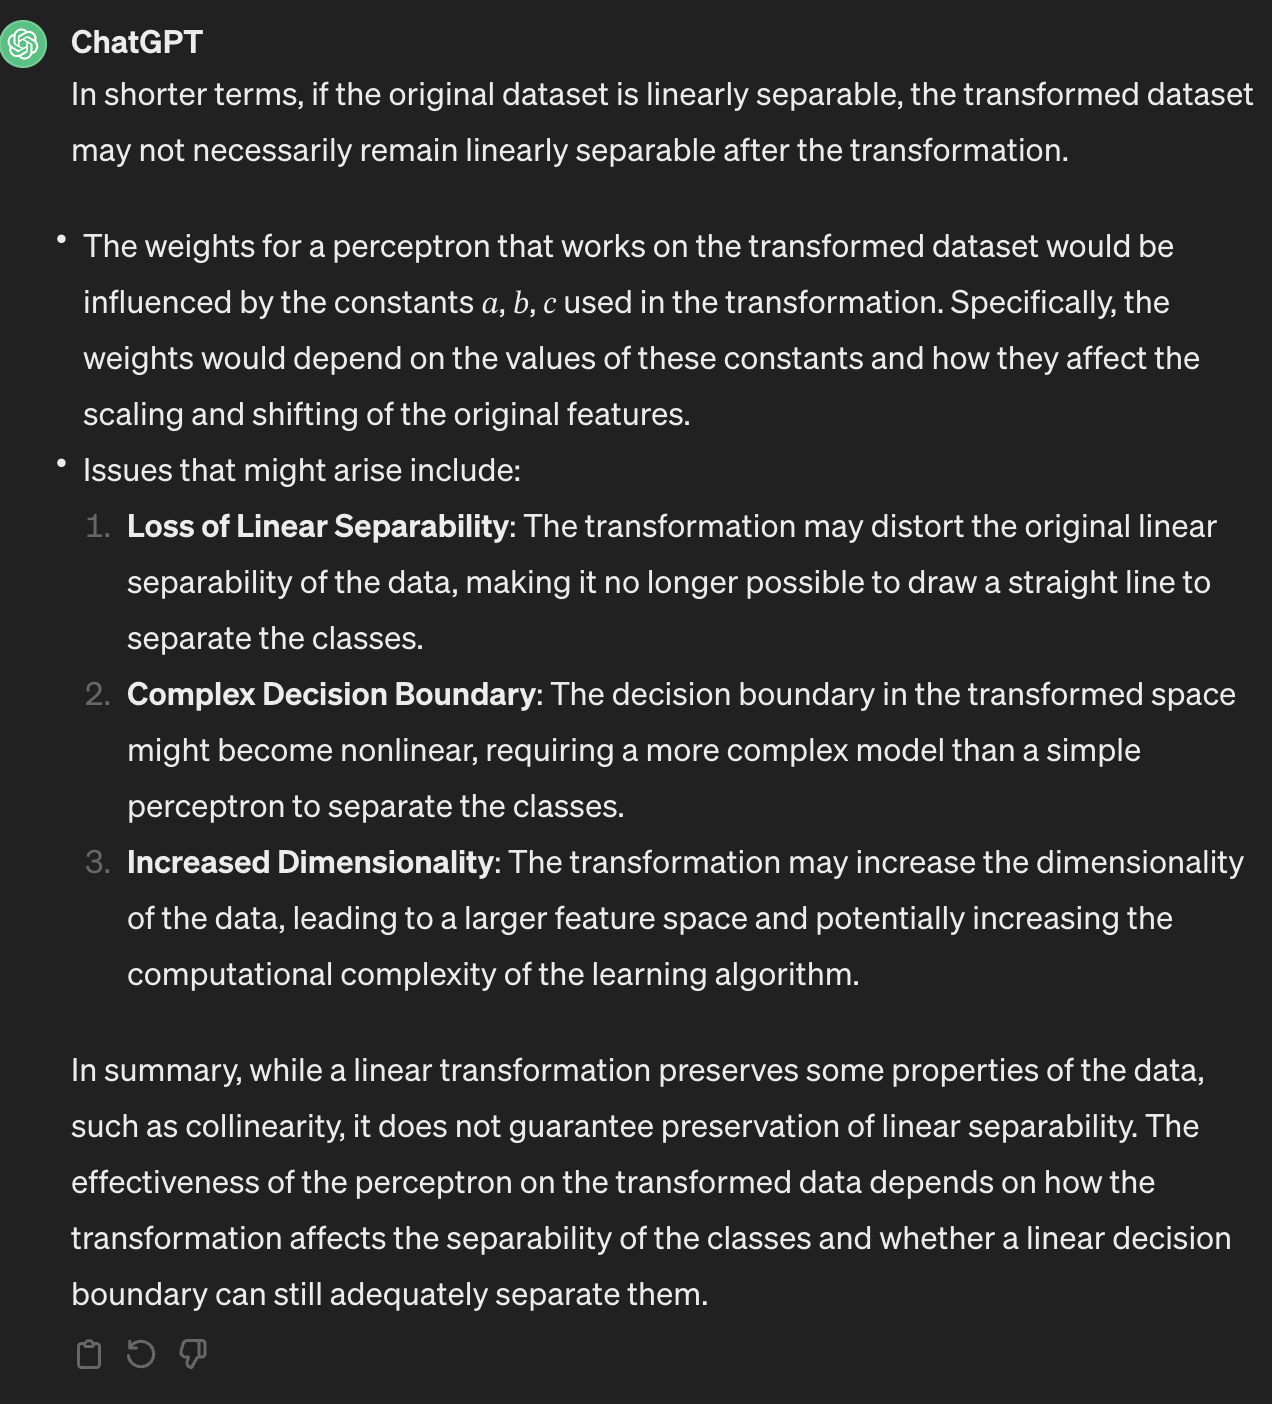

Chatgpt helped me understand this problem a bit more and opened the door that not all the time a transformed set is linearly seperable if the original data is linearly seperable. It also showed more issues that might arise.

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[5,1] =


-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 6: Linear regression with numpy 1-liners**

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [114]:
# here we initialize a random data matrix X and random numerical labels y
import numpy as np

X = np.random.randn(10,3)
y = np.random.randn(10,1)

# we also initialize a hypothetical hyperplane defined by w and b
w = np.random.randn(1,3)
b = -1


In [115]:
# (i) find the numerical labels predicted by the model (w,b) for the points in X
#     your code should be a single numpy line
#     hint: we wrote this equation for a single point x in class
#           try to generalize it by expressing everying in terms of matrices

# your code goes here
y_predicted = np.dot(X, w.T) + b # this is X * W (transposed) + b
print(y_predicted)

[[-0.15266965]
 [-2.4945127 ]
 [ 1.99571237]
 [-0.34690756]
 [-1.39422715]
 [-1.59759546]
 [ 0.36512663]
 [ 0.83542459]
 [-3.62107287]
 [ 1.51166898]]


In [116]:
# (ii) find the updated weights after one application of gradient descent with lr = 0.1
#      your code should be a single numpy line
lr=0.1
w_new = w - lr * np.dot((y_predicted - y).T, X)
print(w_new)


[[-0.07314449  1.04653086 -0.84357612]]


In [ ]:
# Grader's area

maxScore = maxScore +4
# M[6,1] =

maxScore = maxScore +4
# M[6,2] =


-----------------------
-----------------------
-----------------------


In [ ]:
#Grader's area

rawScore = np.sum(M)
score = rawScore*100/maxScore